<h1><span style='color:violet'><center>Machine Learning Project - 2022</center></h1></span>


#### <font color = "# 006666">*__Imports__*<br />

In [359]:
#Importing pandas, matplotlib and numpy libraries.
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, plot_roc_curve,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

### <font color = "# 006666">*__Loading the data__*<br />

In [361]:
# Loading train dataset
X = pd.read_csv('train.csv')      
y = X['purchase']

# Loading test dataset
X_test = pd.read_csv('test.csv')

In [362]:
X_test.shape

(1851, 22)

#### <font color = "# 000000">*__Getting the shape of the data-set__*<br />
#### <font color = "# 000000">*__Train data-set__*<br />

In [363]:
print("Row's number:", X.shape[0]) #the 0 axis is the rows
print("Columns's number:", X.shape[1]) #the 1 axis is the columns

Row's number: 10479
Columns's number: 23


#### <font color = "# 000000">*__Test data-set__*<br />

In [364]:
print("Row's number:", X_test.shape[0]) #the 0 axis is the rows
print("Columns's number:", X_test.shape[1]) #the 1 axis is the columns

Row's number: 1851
Columns's number: 22


### <font color = "# 006666">*__part 1: Data Exploration__*<br />

#### <font color = "# 000000">*__Glimpse of the train data__*<br />

In [365]:
pd.set_option('display.max_columns', None) 
X.head()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,0.0,Feb,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,0.0,0.0,Feb,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,0.0,0.0,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,0.4,Feb,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


#### <font color = "# 000000">*__Checking the type of each feature:__*<br />

In [366]:
X.dtypes

id                         int64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
purchase                   int64
dtype: object

#### <font color = "# 000000">*__Numeric  features:__*<br />

In [367]:
display(X.describe(include = [float]))

,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D
count,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000
mean,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440
std,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571
25%,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657
50%,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221
75%,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061
max,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254


#### <font color = "# 000000">_Observation points:_<br />
* *Noticeable high std in the feature 'total duration' compared to the rest.*
* *'Device' and 'Region' are categorical features but in the data they are written as numeric ones.*


#### <font color = "# 000000">*__Categorical  features:__*<br />

In [368]:
display(X.describe(include = [object]))

,info_page_duration,product_page_duration,Month,internet_browser,user_type,Weekend,A,C
count,10162,9858,10454,9916,10456,10456,9773,10456
unique,1089,7803,10,126,3,2,96,6
top,0.0 minutes,0.0 minutes,May,chrome_89,Returning_Visitor,False,c_2,log200
freq,8176,594,2857,1117,8956,8041,3101,1813


#### <font color = "# 000000">*__The distribution of each numeric feature of the data:__*<br />

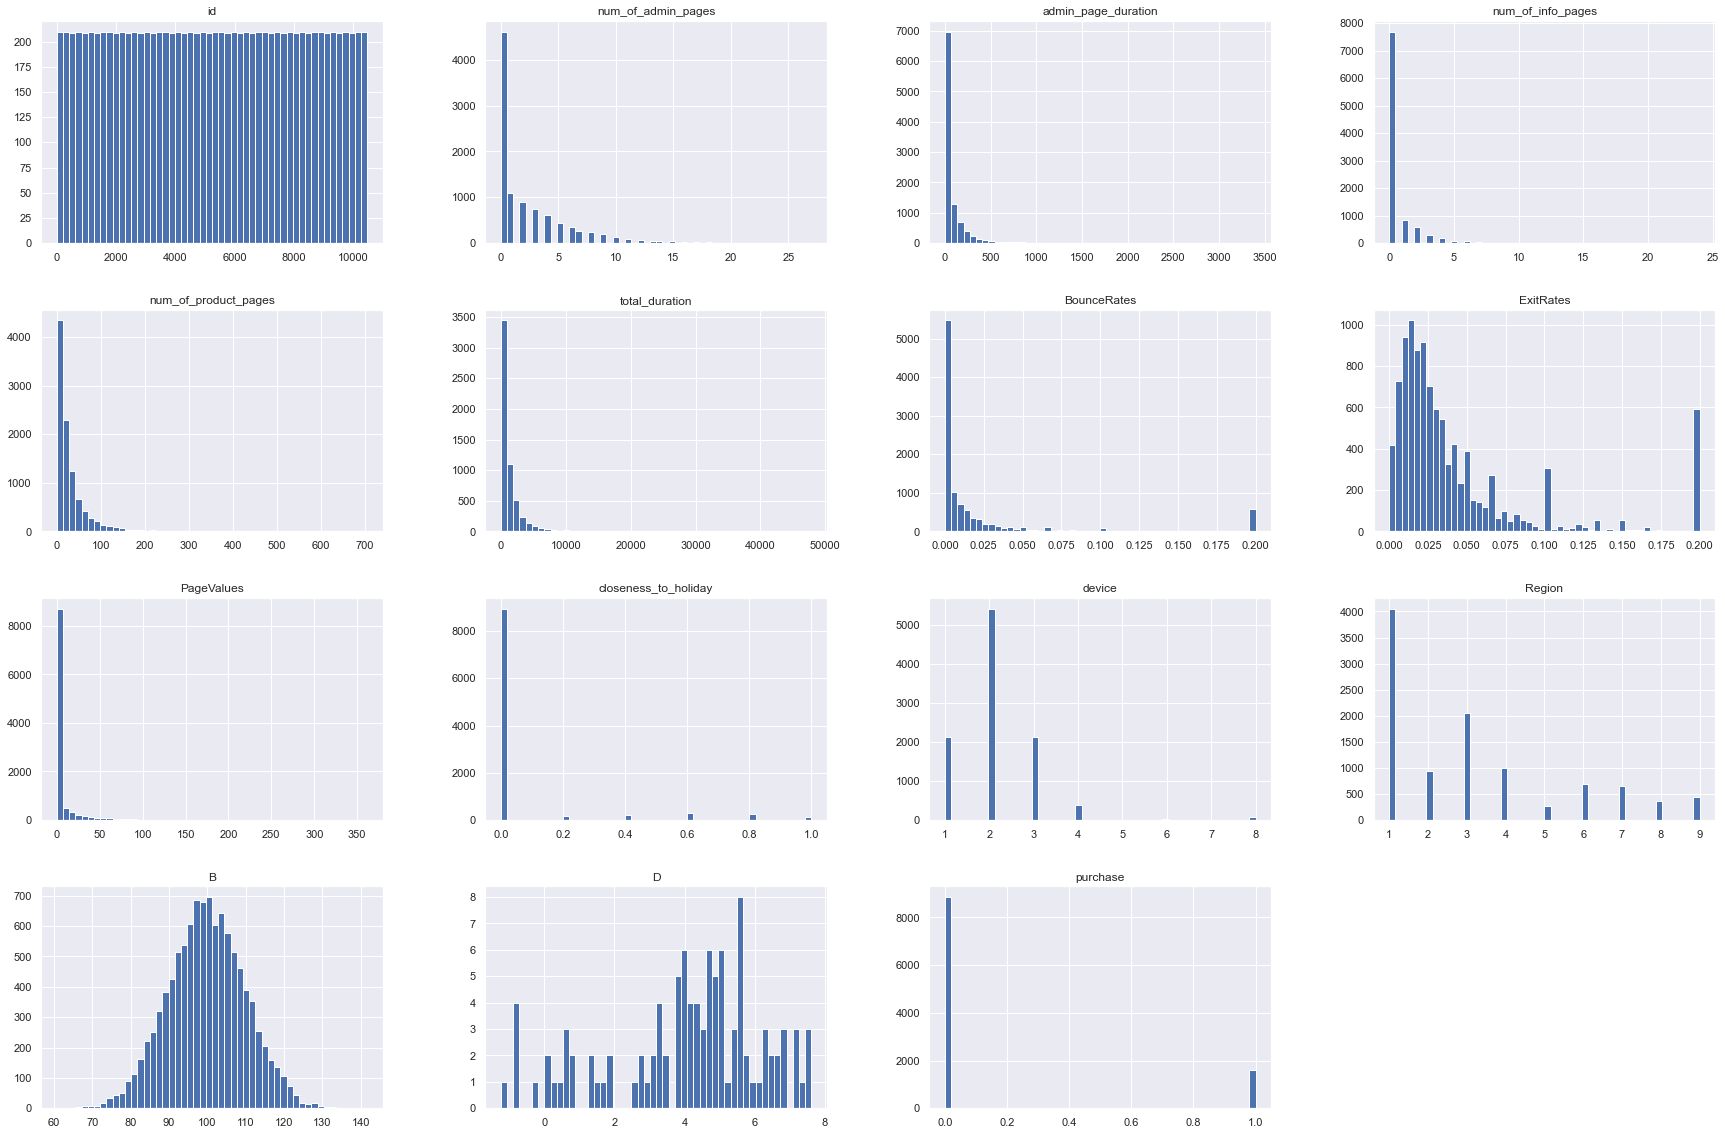

In [369]:
numeric_features = X.select_dtypes(include=np.number)
numeric_features.hist(bins=50,figsize=(30,20))
plt.show()

#### <font color = "# 000000">_Observation points:_<br />
* *'B' is normal distributed.*
* *'ExitRates' is approximately normal distributed.*


#### <font color = "# 000000">*__The distribution of the labels__*<br />

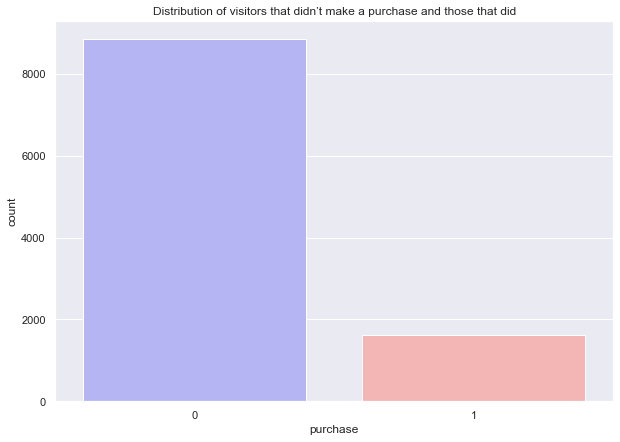

The number of visitors that didn’t make a purchase:  8858

The number of visitors that did make a purchase:  1621


In [370]:
sns.countplot(x='purchase', data=X, palette="bwr").set_title('Distribution of visitors that didn’t make a purchase and those that did')
plt.show()

print ('The number of visitors that didn’t make a purchase: ', (X['purchase']).value_counts()[0])
print ('\nThe number of visitors that did make a purchase: ', (X['purchase']).value_counts()[1])

 #### <font color = "# 000000">*_Observation point:_*<br />

* *As we can see in the histogram above, the labels are imbalance. Almost 85% of the site visitors did not end up making a purchase, while just 15% did make a purchase.*

#### <font color = "# 000000">*__Checking correlation between features:__*<br />

<AxesSubplot:>

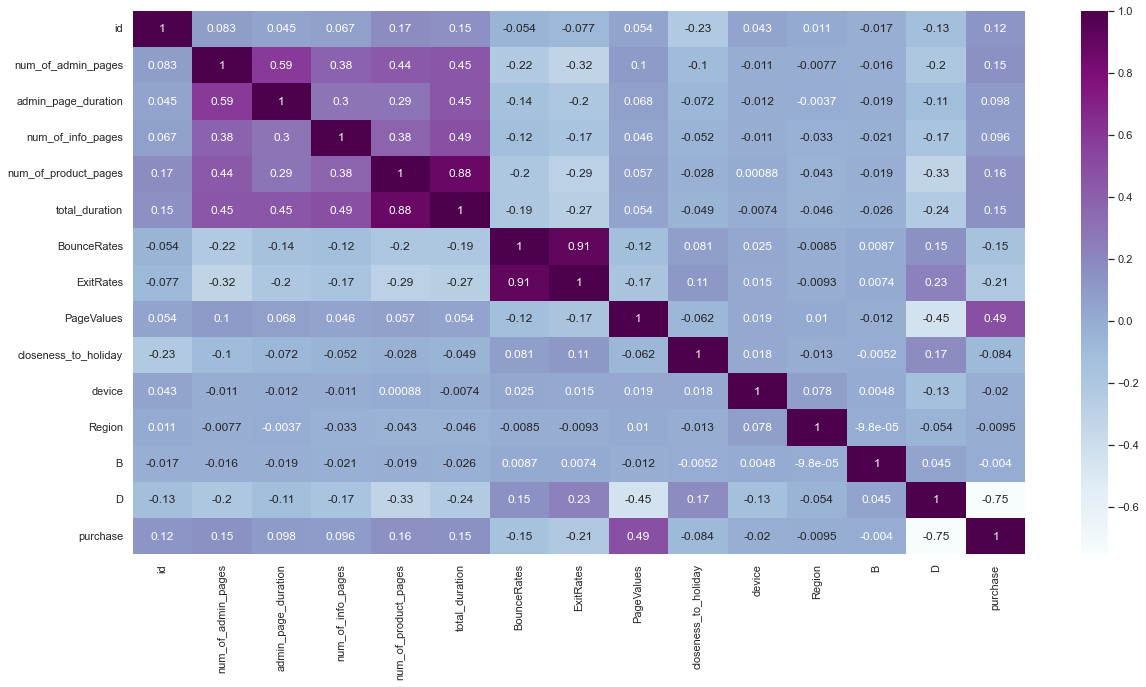

In [371]:
corr_mat= X.select_dtypes(include=np.number)
corr_mat = corr_mat.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True, cmap="BuPu") 

#### <font color = "# 000000">_Observation point:_<br />
* *"total_duration" feature is highly correlated with "num_of_product_pages" so I will drop it since it will not contribute for our goal.* 
* *"BounceRates" feature is highly correlated with "ExitRates" so I will drop it too.*
* *"PageValues" feature is highly correlated with the label - "Purchase".*

 #### <font color = "# 000000">*__Number of sessions that ended up by purchasing from the site:__*<br />
  #### <font color = "# 000000">*__per month:__*<br />


Number of sessions that ended up by purchasing from the site, per month :
May     2857
Nov     2539
Mar     1615
Dec     1450
Oct      471
Sep      379
Jul      367
Aug      365
June     248
Feb      163
Name: Month, dtype: int64


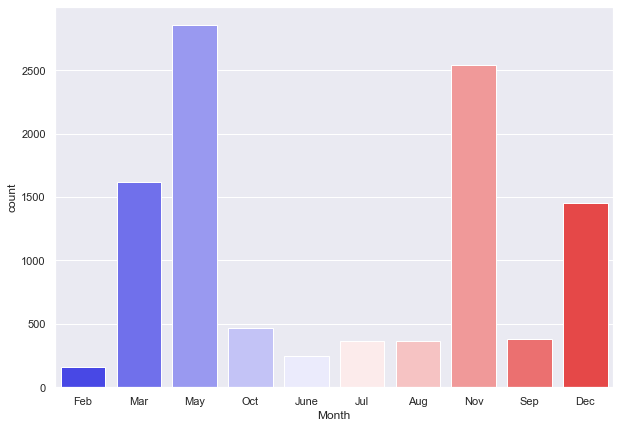

In [372]:
print ('Number of sessions that ended up by purchasing from the site, per month :')
print (X['Month'].value_counts())

months = X['Month'].sort_index(ascending=True, na_position='last')

sns.countplot(x=months,  data=X, palette="bwr")
plt.show()

  #### <font color = "# 000000">*__By Weekend:__*<br />


([<matplotlib.patches.Wedge at 0x1ac1c50c5b0>,
 [Text(-0.8977161187881741, 0.7963075850875069, 'Not in weekend'),
  Text(0.8977160815103247, -0.7963076271126306, 'In weekend')],
 [Text(-0.5236677359597682, 0.46451275796771235, '76.90'),
  Text(0.523667714214356, -0.46451278248236777, '23.10')])

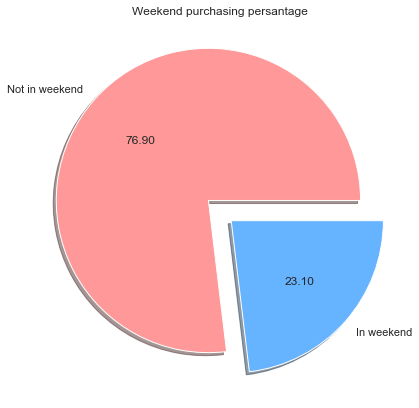

In [373]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Weekend purchasing persantage')
plt.pie(x = X['Weekend'].value_counts(),
       autopct='%.2f',
       colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
       shadow = True,
       labels= ['Not in weekend', 'In weekend'], explode = (0.1,0.1) )

#### <font color = "# 000000">*__Purchasing distribution of regions:__*<br />

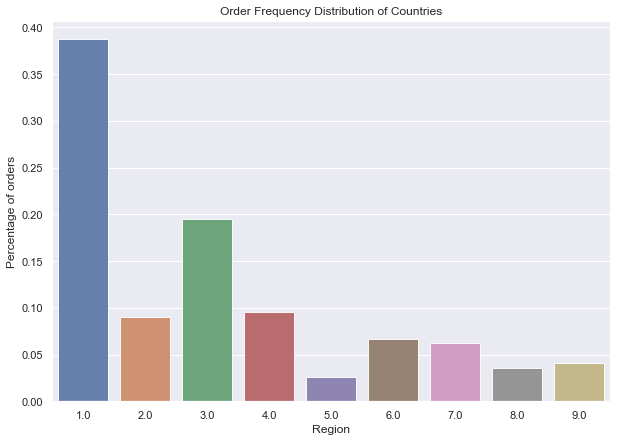

In [374]:
country_count = X['Region'].value_counts(normalize = True)
country_count = country_count[country_count > 0.01]
sns.set(style = "darkgrid")
sns.barplot(country_count.index, country_count.values, alpha = 0.9)
plt.title('Order Frequency Distribution of Countries')
plt.ylabel('Percentage of orders', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.show()

#### <font color = "# 000000">*__PageValues and Number of purchasing:__*<br />

<AxesSubplot:xlabel='purchase', ylabel='PageValues'>

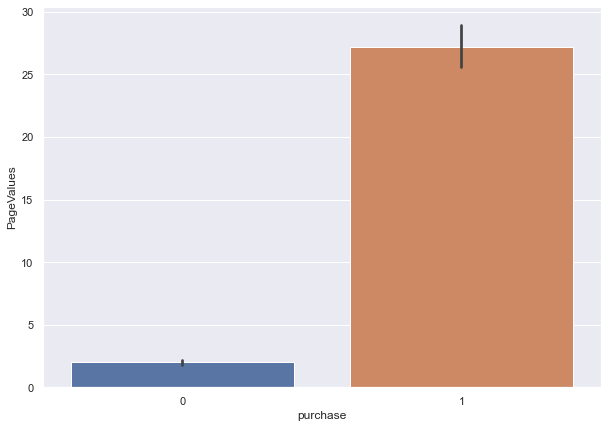

In [375]:
sns.barplot(x=X['purchase'], y=X['PageValues'], data=X)

 #### <font color = "# 000000">*_Observation point:_*<br />

* *PageValues is highly affecting on the purchasing. Increasing in page value leads to an increase in users' purchasing from the site .*

#### <font color = "# 000000">*__plotting the page duration as a function of number of pages:__*<br />

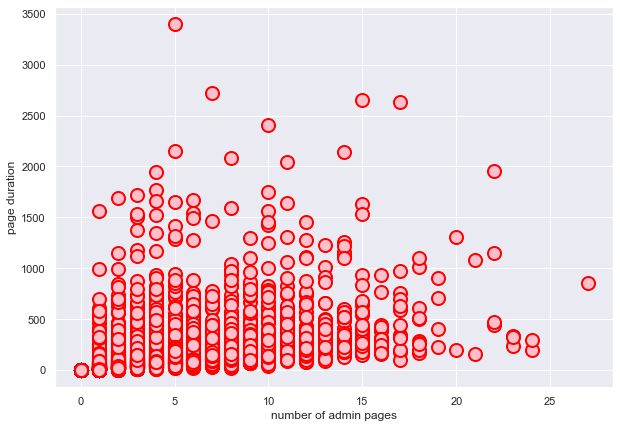

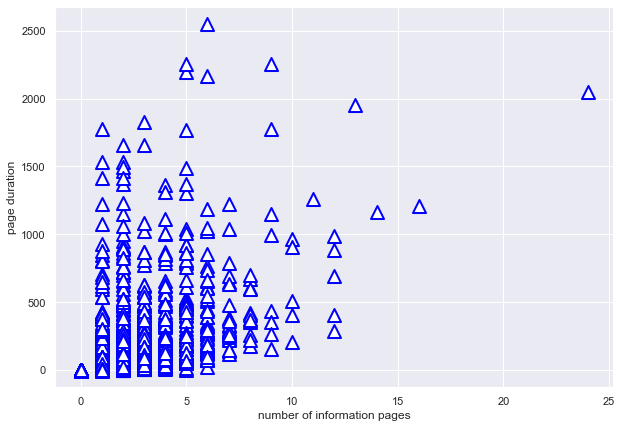

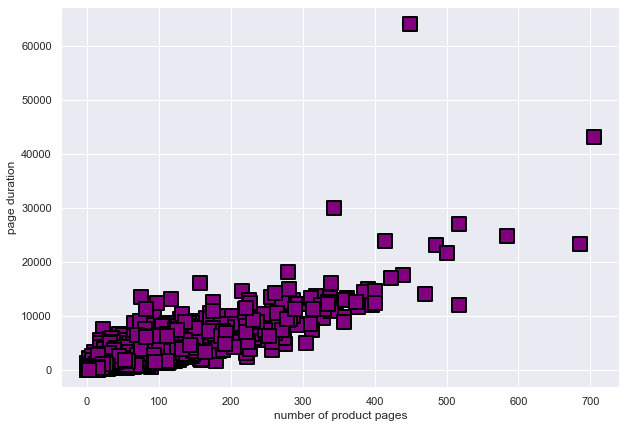

In [376]:
#plotting:  num_of_admin_pages & its page_duration

plt.scatter(x=X['num_of_admin_pages'],y=X['admin_page_duration'], c ="pink",
            linewidths = 2,
            edgecolor ="red",
            s = 170)
plt.xlabel("number of admin pages")
plt.ylabel("page duration")
plt.show()

#extracting the duration from object column ('info_page_duration'), 
# in other words, converting strings to floats:

x_copy = X.copy()

def get_dur (row):
    row = row[:-7]    
    return row

                           #getting info_page_duration & product_page_duration as floats:
x_copy['info_page_duration'] = x_copy['info_page_duration'].dropna().apply( lambda x: get_dur(x)).astype('float')
x_copy['product_page_duration'] = x_copy['product_page_duration'].dropna().apply( lambda x: get_dur(x)).astype('float')


#plotting:  num_of_info_pages & its page_duration

plt.scatter(x=x_copy['num_of_info_pages'],y=x_copy['info_page_duration'], c ="white",
            linewidths = 2,
            marker ="^",
            edgecolor ="blue",
            s = 170)
plt.xlabel("number of information pages")
plt.ylabel("page duration")
plt.show()

#plotting:  num_of_product_pages & its page_duration

plt.scatter(x=x_copy['num_of_product_pages'],y=x_copy['product_page_duration'], c ="purple",
            linewidths = 2,
            marker ="s",
            edgecolor ="black",
            s = 170)
plt.xlabel("number of product pages")
plt.ylabel("page duration")
plt.show()

#### <font color = "# 000000">_Observation point:_<br />
* *According to the graph of  page duration and the number of product pages, we can see that as the number of the pages get higher, the longer the browsing time. while in the other graphs of the page duration, we cannot conclude as such conclusion.*

#### <font color = "# 000000">*__Categorical features:__*<br />
#### <font color = "# 000000">*__User type and purchasing:__*<br />

Returning_Visitor    8956
New_Visitor          1428
Other                  72
Name: user_type, dtype: int64


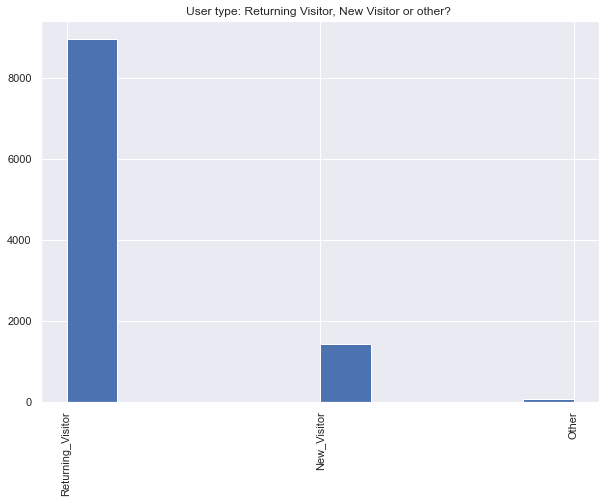

In [377]:
User_type = X['user_type']
print(User_type.value_counts())
User_type.hist()
User_type.unique()
plt.xticks(rotation = 90)
plt.title('User type: Returning Visitor, New Visitor or other? ')
plt.show()

#### <font color = "# 000000">*__Device and purchasing:__*<br />

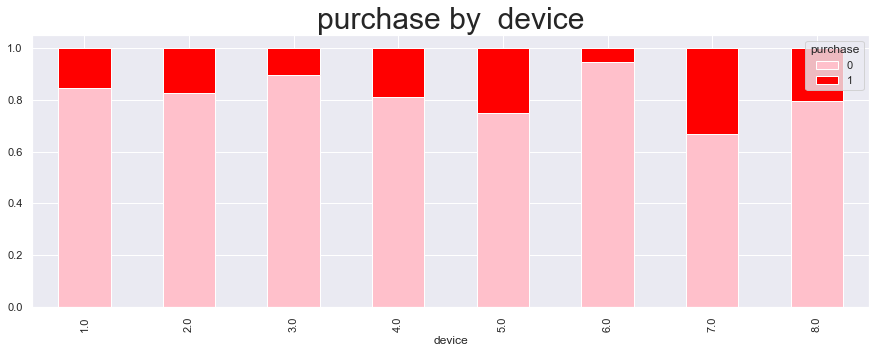

In [378]:
df = pd.crosstab(X['device'], X['purchase'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'red'])
plt.title('purchase by  device', fontsize = 30)
plt.show()


#### <font color = "# 000000">*__Comparing distributions of BounceRates, ExitRates and PageValues with respect to 'purchase':__*<br />

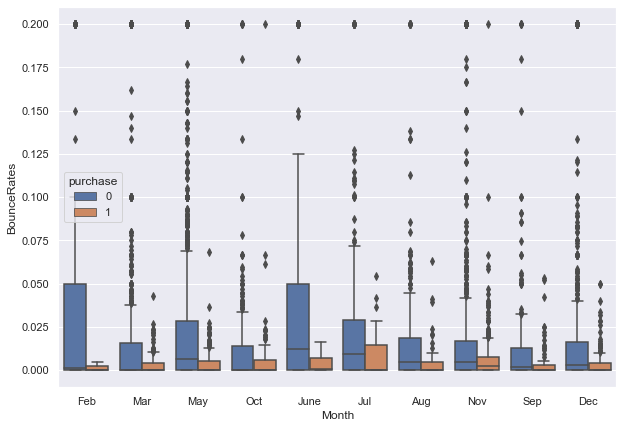

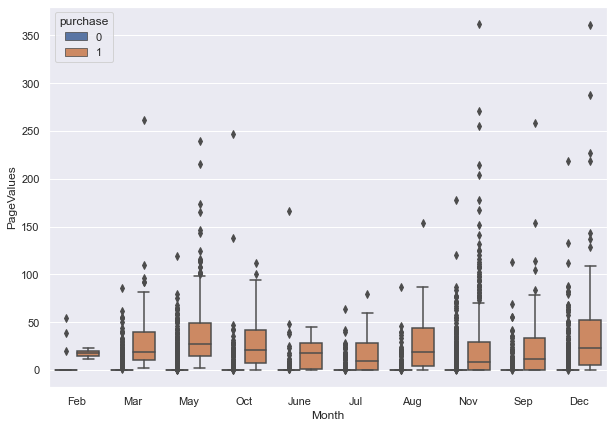

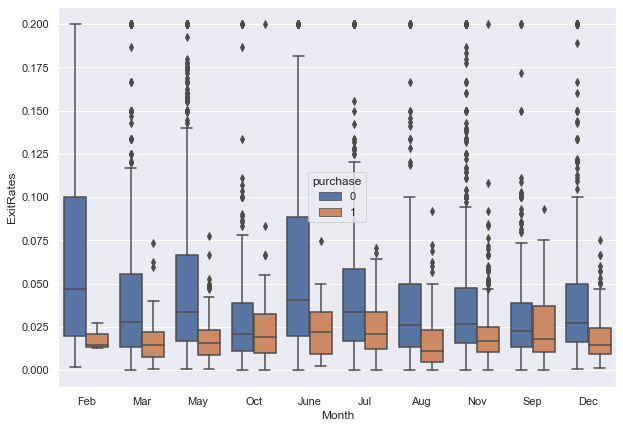

In [379]:
g_analytics_measures = [X['BounceRates'], X['PageValues'], X['ExitRates']]
for measure in g_analytics_measures:
    plt.rcParams['figure.figsize'] = (10, 7)
    sns.boxplot(x = X['Month'], y = measure, hue = y)
    plt.show()      

## <font color = "# 006666">*__Part 2: Pre-processing__*<br />

#### <font color = "# 000000">*__Copying the data:__*<br />

In [380]:
# train dataset
df_train = X.copy()

# test dataset
df_test = X_test.copy() 

#### <font color = "# 000000">*__Number of Null values and its percent from each feature:__*<br />

In [381]:
total_missing = df_train.isnull().sum().sort_values(ascending=False)
percent_missing = (total_missing * 100 / len(df_train)).sort_values( ascending=False)

missing_values = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missings', 'Percent'])
missing_values.head()


,Total Missings,Percent
D,10374,98.997996
total_duration,4753,45.357381
A,706,6.737284
num_of_info_pages,687,6.555969
product_page_duration,621,5.926138


#### <font color = "# 000000">_Observation point:_<br />
* *column with 98.9% (D) of Null values will not contribute for our prediction, therefore, dropping it is the better choice.*

In [382]:
#checking if labels has null values
y.isna().any()

False

In [383]:
#counting zeros with low variance
total = df_train.shape[0]
percent = pd.DataFrame(((df_train == 0).sum(axis=0)/total*100).sort_values(ascending=False),columns = ['zeros percent'])
percent.head()

,zeros percent
closeness_to_holiday,85.485256
purchase,84.530967
PageValues,77.660082
Weekend,76.734421
num_of_info_pages,73.413494


#### <font color = "# 000000">_Observation point:_<br />
* *closeness_to_holiday won't contribute that much to the prediction, it will be dropped.*

#### <font color = "# 000000">*__Dropping features:__*<br />

In [384]:
#drop D - it has 99% missing data
#drop total_duration & BounceRates - are highly correlated with another features
#drop closeness_to_holiday - it has 85% zero values
#drop purchase - it is the label and saved in y

def drop_col(df):
    df = df.drop(columns=['D', 'total_duration', 'BounceRates', 'closeness_to_holiday'])               #'purchase' should i drop it here\ i droped it in features reduction
    return df

In [385]:
df_train = drop_col(df_train)

df_test = drop_col(df_test)

df_train.columns

Index(['id', 'num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages',
       'info_page_duration', 'num_of_product_pages', 'product_page_duration',
       'ExitRates', 'PageValues', 'Month', 'device', 'internet_browser',
       'Region', 'user_type', 'Weekend', 'A', 'B', 'C', 'purchase'],
      dtype='object')

#### <font color = "# 000000">*__Converting object data to numeric data: from train and__* <font color = "# FF0000">*__test dataset:__*<br />
#### <font color = "# 000000">_info_page_duration & product_page_duration: these two features are numeric data that were written as string, therfore, converting them before detecting the outliers is important_<br />
#### <font color = "# 000000">_Weekend: Is also written as string_<br />

In [386]:
# convert "info_page_duration" & "product_page_duration"
def get_dur (row):
    row = row[:-7]    
    return row

# converting the features of train dataset
def object_to_num(df):
    df['Weekend'] = pd.to_numeric(df['Weekend']*1)   #convert weekend - bool values
    df['info_page_duration'] = df['info_page_duration'].dropna().apply( lambda x: get_dur(x)).astype('float')
    df['product_page_duration'] = df['product_page_duration'].dropna().apply( lambda x: get_dur(x)).astype('float')
    return df

In [387]:
df_train = object_to_num(df_train)

df_test = object_to_num(df_test)

#### <font color = "# 000000">*__Outliers detecting and removal:__*<br />
#### <font color = "# FF0000">_only the outliers of train dataset_<br />

#### <font color = "# 000000">_Discover outliers with visualization tool, Box plot:_<br />

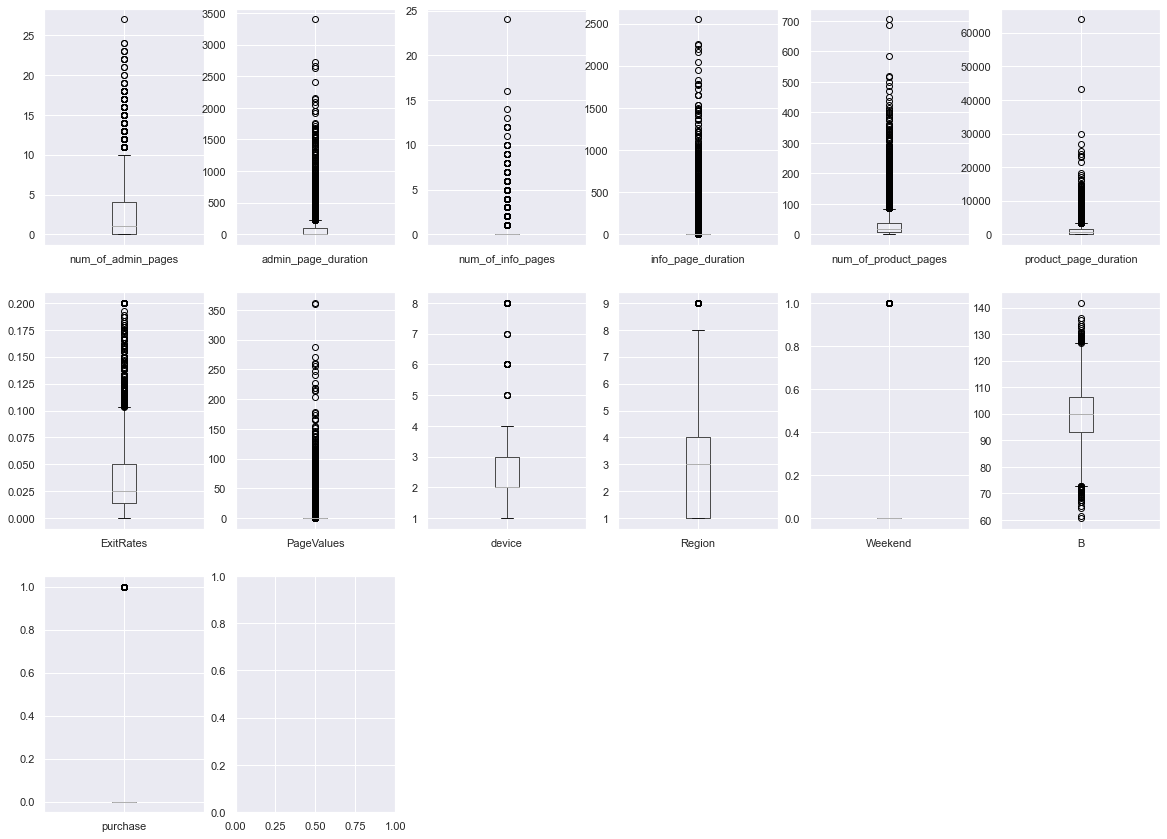

In [388]:
lst_of_features = [feature for feature in df_train.columns if df_train[feature].dtype!='O']  # getting non object data only

#plotting
i = 1
for col in lst_of_features:
    df_train.boxplot(column =col, figsize = (20,20),vert = True)
    plt.subplot(4,6,i)
    i+=1

#### <font color = "# 000000">_As we saw in the graphs of the distribution above - part 1, B is normal distributed, so we can use z score to find the percent of the outliers of this feature:_<br />

In [389]:
zscore = ((df_train['B'] - df_train['B'].mean()) / (df_train['B'].std(ddof=0)))
print('B' + ":\n p(zscore > 3): " + str((zscore > 3).mean()*100) +"\n")


B:
 p(zscore > 3): 0.11451474377326079



#### <font color = "# 000000">_Observation point:_<br />
* *According to z score, the outliers are only a small part of the data (of B), so, we can drop them.*

#### <font color = "# 000000">_Dropping outliers from B and ExitRates only (they almost normal distributed): using IQR_<br />

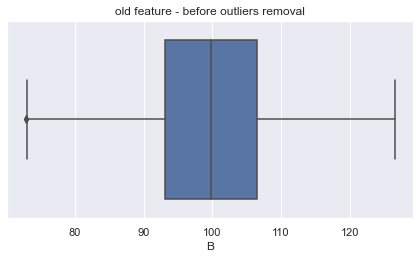

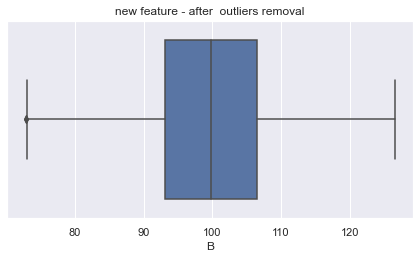

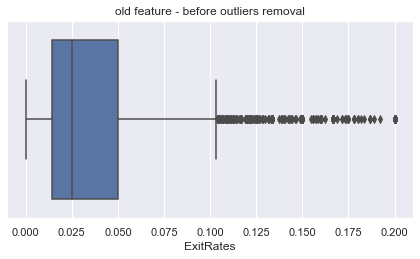

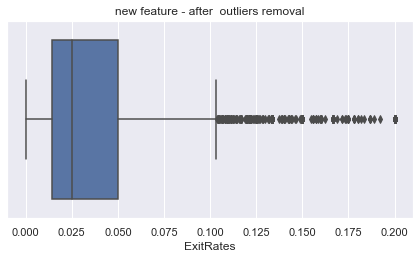

In [390]:
# IQR

col_name = ['B', 'ExitRates']

def remove_outliers_from_dataframe(df, col):
    for col in col:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit  = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        new_df = df.loc[(df[col] > lower_limit) & (df[col] < upper_limit)]
        return new_df

new_df = remove_outliers_from_dataframe(df_train, col_name)

i=1
for col in col_name:

    plt.figure(figsize=(16,8))
    sns.distplot(df_train[col])
    plt.subplot(2,2,4)
    a = sns.boxplot(new_df[col])
    plt.figure(figsize=(16,8))
    sns.distplot(df_train[col])
    plt.subplot(2,2,4)
    b = sns.boxplot(new_df[col])
    
    a.title.set_text('old feature - before outliers removal')
    b.title.set_text('new feature - after  outliers removal')
    plt.show()

df_train = new_df


#### <font color = "# 000000">*__Converting numeric data to object data: train and test dataset:__*<br />
#### <font color = "# 000000">_'device and 'region': these feaures are categorecal ones but written as numbers. This will give value to the data based on their numbers. therefore, i choose to convert them to object and then convert them to dummy variables_<br />

In [391]:
# converting device & Region to object in order to convert them to dummy variables. doing so will prevent standardization - we dont want to give device number 8 bigger value than
#device number 4.

# def num_to_obj(df):
#     df['device'] = df['device'].astype(object)
#     df['Region'] = df['Region'].astype(object)
#     return df

In [392]:
# df_train = num_to_obj (df_train)

# df_test = num_to_obj (df_test)   #CANT DO THIS ON TEST DATA!

#### <font color = "# FF0000">*__I decided not to convert them to objects, because PCA will not be used.__*<br />


#### <font color = "# 000000">_Converting categorical variables to dummy ones: 'A', 'C', 'internet_browser', 'user_type'and 'Month':_<br />
#### <font color = "# 000000">_One more step before converting them, I will divide 'A' & 'internet_browser' values into groups:_<br />
'internet_browser' will contain: edge, browser, chrome, safari <br />
'A' will contain: 'c_1', 'c_3', 'c_4', 'c_2', 'c_5', 'c_6', 'c_8', 'c_10',<br />
                     'c_11', 'c_9', 'c_7', 'c_13', 'c_14', 'c_15', 'c_18', 'c_19',
                     'c_16', 'c_17', 'c_20


In [393]:
def grouping_values(df):
         
    df['A'] = np.where(df['A'].str.contains('c_20'), 'c_20', df['A'])

    df['internet_browser'] = df['internet_browser'].dropna().apply( lambda x: x.split('_'))
    df['internet_browser'] = df['internet_browser'].dropna().apply( lambda x: x[0])
    
    return df

In [394]:
df_train = grouping_values(df_train)

df_test = grouping_values(df_test)

In [395]:
# Dummy variables for A, C, internet_browser, user_type and Month
df_train = pd.get_dummies(df_train)

display(df_train.describe())


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,ExitRates,PageValues,device,Region,Weekend,B,purchase,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,internet_browser_browser,internet_browser_chrome,internet_browser_edge,internet_browser_safari,user_type_New_Visitor,user_type_Other,user_type_Returning_Visitor,A_c_1,A_c_10,A_c_11,A_c_13,A_c_14,A_c_15,A_c_16,A_c_17,A_c_18,A_c_19,A_c_2,A_c_20,A_c_3,A_c_4,A_c_5,A_c_6,A_c_7,A_c_8,A_c_9,C_log200,C_log202,C_log400,C_log404,C_log8080,C_log_100
count,10382.000000,9797.000000,9982.000000,9707.000000,10080.000000,9996.000000,9773.000000,10364.000000,10363.000000,10069.000000,10371.000000,10370.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000
mean,5231.784916,2.321731,80.443941,0.500876,34.441409,31.764906,1193.529130,0.042868,5.909030,2.122554,3.154951,0.230955,99.765292,0.154402,0.034964,0.138027,0.015604,0.035253,0.023791,0.154402,0.273647,0.241765,0.044596,0.036313,0.091793,0.612310,0.056155,0.186669,0.136679,0.006839,0.855327,0.185995,0.032749,0.018975,0.055770,0.000963,0.002986,0.000289,0.000096,0.000674,0.001348,0.296282,0.081969,0.157291,0.081006,0.019746,0.031882,0.003275,0.025621,0.003082,0.173184,0.157677,0.167887,0.167501,0.166924,0.165768
std,3024.900885,3.335744,178.498129,1.261205,142.542514,44.570098,1951.250732,0.048270,18.770520,0.905813,2.407558,0.421464,9.754208,0.361351,0.183698,0.344945,0.123943,0.184428,0.152405,0.361351,0.445851,0.428173,0.206426,0.187076,0.288748,0.487247,0.230232,0.389665,0.343525,0.082418,0.351788,0.389121,0.177987,0.136444,0.229487,0.031022,0.054565,0.016997,0.009814,0.025959,0.036699,0.456639,0.274330,0.364093,0.272857,0.139132,0.175695,0.057136,0.158010,0.055435,0.378425,0.364455,0.373784,0.373441,0.372926,0.371890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,72.828611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2614.250000,0.000000,0.000000,0.000000,0.000000,7.000000,183.000000,0.014279,0.000000,2.000000,1.000000,0.000000,93.062813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5224.500000,1.000000,8.000000,0.000000,0.000000,18.000000,597.633053,0.025195,0.000000,2.000000,3.000000,0.000000,99.784006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7848.750000,4.000000,93.251667,0.000000,0.000000,38.000000,1464.209618,

In [396]:
df_test = pd.get_dummies(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1851 non-null   int64  
 1   num_of_admin_pages           1758 non-null   float64
 2   admin_page_duration          1773 non-null   float64
 3   num_of_info_pages            1725 non-null   float64
 4   info_page_duration           1787 non-null   float64
 5   num_of_product_pages         1774 non-null   float64
 6   product_page_duration        1738 non-null   float64
 7   ExitRates                    1849 non-null   float64
 8   PageValues                   1849 non-null   float64
 9   device                       1787 non-null   float64
 10  Region                       1849 non-null   float64
 11  Weekend                      1849 non-null   float64
 12  B                            1849 non-null   float64
 13  Month_Aug         

#### <font color = "# 000000">*__Checking if the data has infinity values:__*<br />

In [397]:
def check_inf(df):
    num_inf = np.isinf(df_train).values.sum()
    print(num_inf)

In [398]:
check_inf(df_train)

check_inf(df_test)

0
0


#### <font color = "# 000000">*__Filling missing values with the random values from the dataset:__*<br />

In [399]:
def filling_nans(df):
    for column in df.columns:
        df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) 
                                      if pd.isnull(x) else x)
    return df

In [400]:
df_train = filling_nans(df_train)

df_test = filling_nans(df_test)

In [401]:
#Checking null values - after filling
nan_values_train = df_train[df_train.columns[df_train.isna().any()]].shape[1]

nan_values_test = df_test[df_test.columns[df_test.isna().any()]].shape[1]

print ('columns with nan: ', nan_values_train)
print ('columns with nan: ', nan_values_test)

columns with nan:  0
columns with nan:  0


#### <font color = "# 000000">*_We got zero columns which have nan values, that means that the fill_nan function worked successfully._*<br />

#### <font color = "# 000000">*__Data Normalization:__*<br />

The different variables present different value ranges, therefore different magnitudes. Not only the minimum and maximum values are different, but they also spread over ranges of different widths.

In [402]:
def normalization(df):

    norm = MinMaxScaler().fit(df)

    # transform training data
    X_train_norm = norm.transform(df)

    X_train_norm = pd.DataFrame(X_train_norm, columns=df.columns)

    return df

In [403]:
df_train = normalization(df_train)

df_test = normalization(df_test)

#### <font color = "# 000000">*__Glimpse of the updated data:__*<br />

In [404]:
pd.set_option('display.max_columns', None)

print('Updated data shape:', np.shape(df_train))

df_train.head()


Updated data shape: (10382, 56)


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,ExitRates,PageValues,device,Region,Weekend,B,purchase,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,internet_browser_browser,internet_browser_chrome,internet_browser_edge,internet_browser_safari,user_type_New_Visitor,user_type_Other,user_type_Returning_Visitor,A_c_1,A_c_10,A_c_11,A_c_13,A_c_14,A_c_15,A_c_16,A_c_17,A_c_18,A_c_19,A_c_2,A_c_20,A_c_3,A_c_4,A_c_5,A_c_6,A_c_7,A_c_8,A_c_9,C_log200,C_log202,C_log400,C_log404,C_log8080,C_log_100
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.0,1.0,1.0,0.0,118.880094,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.0,4.0,9.0,0.0,113.358423,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,0.0,0.0,0.0,0.0,89.0,627.500000,0.050000,0.0,3.0,1.0,1.0,121.507695,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,3,0.0,0.0,0.0,0.0,19.0,154.216667,0.024561,0.0,2.0,1.0,0.0,93.747176,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.0,2.0,3.0,0.0,99.545824,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


#### <font color = "# 000000">*__Dimension reduction:__*<br />

#### <font color = "# 000000">_AS we saw, 'Device' and 'Region' are written as numeric data. So, applying PCA in order to reduce the dimension is not a good choice since PCA is very sensitive to data standardization (affected by scale), so I will apply the mutual_info_classif:_<br />

In [405]:
from sklearn.feature_selection import mutual_info_classif

df_t_copy = df_train.copy()           

label = df_t_copy['purchase']         # SAVING THE LABELS BEFORE DROPPING            

mi_score=mutual_info_classif(df_t_copy.drop('purchase', axis=1), label)
mi_score=pd.Series(mi_score*100,index=df_t_copy.drop('purchase', axis=1).columns)
mi_score=mi_score.sort_values(ascending=False)
mi_score


PageValues                     16.282294
ExitRates                       4.017747
product_page_duration           3.081416
num_of_product_pages            1.752161
admin_page_duration             1.723269
num_of_admin_pages              1.236581
Month_Nov                       1.187440
user_type_Returning_Visitor     1.153894
id                              1.065219
info_page_duration              0.808580
A_c_2                           0.799967
user_type_New_Visitor           0.760827
A_c_15                          0.705909
Month_Feb                       0.633563
A_c_6                           0.612431
num_of_info_pages               0.595255
A_c_1                           0.500707
Month_Dec                       0.434992
A_c_20                          0.408605
A_c_7                           0.389754
device                          0.363096
A_c_5                           0.362212
A_c_18                          0.349664
Month_May                       0.308202
Month_June      

In [406]:
best_features=mi_score.index[:25]
df = df_t_copy[best_features]
display(df.describe())

,PageValues,ExitRates,product_page_duration,num_of_product_pages,admin_page_duration,num_of_admin_pages,Month_Nov,user_type_Returning_Visitor,id,info_page_duration,A_c_2,user_type_New_Visitor,A_c_15,Month_Feb,A_c_6,num_of_info_pages,A_c_1,Month_Dec,A_c_20,A_c_7,device,A_c_5,A_c_18,Month_May,Month_June
count,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000,10382.000000
mean,5.913263,0.042885,1190.010802,31.826334,80.155849,2.336255,0.241765,0.855327,5231.784916,34.343984,0.296282,0.136679,0.002986,0.015604,0.031882,0.502119,0.185995,0.138027,0.081969,0.003275,2.122905,0.019746,0.000674,0.273647,0.023791
std,18.764453,0.048295,1932.777088,44.557714,177.277837,3.355148,0.428173,0.351788,3024.900885,141.749549,0.456639,0.343525,0.054565,0.123943,0.175695,1.264525,0.389121,0.344945,0.274330,0.057136,0.907491,0.139132,0.025959,0.445851,0.152405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.014284,182.000000,7.000000,0.000000,0.000000,0.000000,1.000000,2614.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.025220,597.600000,18.000000,7.000000,1.000000,0.000000,1.000000,5224.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.050000,1469.163556,38.000000,92.812500,4.000000,0.000000,1.000000,7848.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000
max,361.763742,0.200000,63973.522230,705.000000,3398.750000,27.000000,1.000000,1.000000,10478.000000,2549.375000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000


#### <font color = "# 000000">_Getting the best features in another way, to make sure with feature selection:_<br />

Text(0.5, 0, 'Feature Importance')

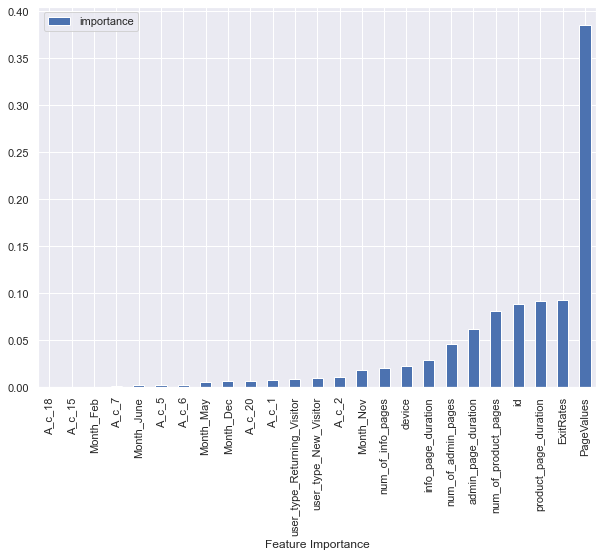

In [407]:
rfc = RandomForestClassifier(100)
rfc.fit(df, label)
rfc_train = rfc.score(df, label)

rfc.feature_importances_

# plotting feature importance so i can choose the best of them
feature_importance = pd.DataFrame({'importance': rfc.feature_importances_}, index= df.columns).sort_values('importance')
feature_importance.plot.bar()
plt.xlabel("Feature Importance")

#### <font color = "# 000000">_According to the mutual_info_classif and feature_importances I will choose only the best 16 features for modeling, These  features have the largest effect on the model and its predection._<br />

In [408]:
bestOfthebest = best_features[:16]

df= df[bestOfthebest]

df_test = df_test[bestOfthebest]


## <font color = "# 006666">*__Splitting the dataset__*<br />

In [409]:
df = df.drop(['id'], axis=1)
# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(df, label, test_size=0.3,stratify=label ,random_state=42)


In [410]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


(7267, 15)
(7267,)
(3115, 15)
(3115,)


## <font color = "# 006666">*__Part 3: Modeling__*<br />

#### <font color = "# 000000">*__Finding hyperparameter for each model:__*<br />
#### <font color = "# FF0000">*__I'M NOT SURE IF YOU WANT TO RUN THE GRIDSEARCHCV() FUNCTIONS, IN THIS PART, SO I WILL PUT THE NEXT 8 "CODE SLIDES" WITH COMMAND/__*<br />

#### <font color = "# FF0000">*__LogisticRegression:__*<br />

In [411]:

# tuned_parameters = {
#   'penalty':['l2', 'l1'],
#   'C':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0], 
#   'fit_intercept':[True, False],
#   'random_state':[None, 1, 0], 
#   'solver':['lbfgs', 'sag'], 
#   'max_iter':[70, 100, 200],
# }

# reg = LogisticRegression(random_state=0)

# gs = GridSearchCV(reg, tuned_parameters, cv=KFold(5) ,scoring='roc_auc')
# gs.fit(X_train, y_train)


In [412]:
# print ('Logistic Regression chosen parameters (recieved best AUC): {}'.format(gs.best_params_))
# print ("Logistic Regression AUC score with the chosen parameters: ", gs.best_score_)
# prediction=gs.predict(X_val)

#### <font color = "# FF0000">*__KNN:__*<br />

In [413]:
# tuned_parameters = {
#   'n_neighbors':[5, 10, 20, 22],
#   'weights':['uniform', 'distance' ], 
#   'metric':['euclidean','minkowski' ],
#   'algorithm':['brute', 'auto'], 

# }

# knn = KNeighborsClassifier()

# gs = GridSearchCV(knn, tuned_parameters, cv=KFold(5) ,scoring='roc_auc')
# gs.fit(X_train, y_train)

In [414]:
# print ('KNN chosen parameters (recieved best AUC): {}'.format(gs.best_params_))
# print ("KNN AUC score with the chosen parameters: ", gs.best_score_)
# prediction=gs.predict(X_val)

#### <font color = "# FF0000">*__Random Forest Classifier:__*<br />

In [415]:
# tuned_parameters = {
#     'n_estimators':[20,40,100],
#     'criterion':['gini', 'entropy'],
#     'max_depth':[2,4,8],
#     'max_features': [1,7,15]
# }
# rf = RandomForestClassifier(random_state=0)
# gs = GridSearchCV(rf, tuned_parameters, scoring='roc_auc',cv=KFold(5))
# gs.fit(X_train, y_train)

In [416]:
# print ('Random Forest chosen parameters (recieved best AUC): {}'.format(gs.best_params_))
# print ("Random Forest AUC score with the chosen parameters: ", gs.best_score_)
# prediction=gs.predict(X_val)


#### <font color = "# FF0000">*__SVM:__*<br />

In [417]:
# tuned_parameters = {
#   'C': [1, 10, 100], 
#   'gamma': [1,0.1,0.01,0.001],
#   'kernel': ['rbf', 'poly', 'sigmoid'],
#   'probability': [True, False]
# }

# sv = svm.SVC()

# gs = GridSearchCV(sv, tuned_parameters, cv=KFold(5) ,scoring='roc_auc')
# gs.fit(X_train, y_train)

In [418]:
# print ('SVM chosen parameters (recieved best AUC): {}'.format(gs.best_params_))
# print ("SVM AUC score with the chosen parameters: ", gs.best_score_)
# prediction=gs.predict(X_val)

#### <font color = "# FF0000">*__Applying the classifiers with the best hyper-parameters as we found above - by GridSearchCV function__*<br />

In [419]:
# choosing 2 simple classifiers

reg = LogisticRegression(C=10.0, fit_intercept= True, max_iter= 100, penalty= 'l2', random_state= None, solver= 'lbfgs') 
knn = KNeighborsClassifier(algorithm= 'brute', metric= 'euclidean', n_neighbors= 22, weights='distance')

#choosing 2 advanced classifiers
rfc = RandomForestClassifier(criterion='entropy', max_depth= 8, max_features= 7, n_estimators= 100)  
svmc = svm.SVC(C= 10, gamma=0.01, kernel='rbf', probability=True)  #predict_proba is not available when  probability=False
clfs = [reg, knn, rfc, svmc]

#fit each classifier to our training data:
for clf in clfs:
    clf.fit(X_train,y_train)


## <font color = "# 006666">*__Part 4: Models Evaluating__*<br />

#### <font color = "# 000000">*__confusion matrix for Random Forest Clasifier classifier:__*<br />
*A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.*

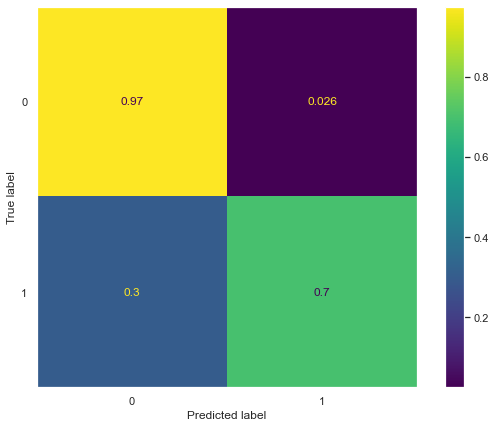

In [420]:
plot_confusion_matrix(rfc,X_train,y_train,normalize='true')
plt.grid(False)
plt.show()

The confusion matrix gives a better idea of what the Random Forest classifier  is getting right and what types of errors it is making. According to the confusion matrix above:

* *The model predicted 0.97 of the sessions that ended by purchasing. while it predicted that 0.026 of the sessions did end by purchasing but it was wrong.*

* *The model predicted 0.70 of the sessions that didn't end by purchasing. while it predicted that 0.30 of the sessions didn't end by purchasing, wrongly.*

in other words, 
* *The classifier Random Forest correctly identified 97% of True negatives(top left), as well as  70% of True Positives(bottom right),*

* *The top right cell represents the missclassified negatives(False Positives)and the bottom left cell represents the misclassified positives (False Negatives).*

So, we can conclude that the Random Forest model can predict correctly almost of the labels that equal to 1, while it gets wrong the labels that equal to 0. 



#### <font color = "# 000000">*__K-Fold Cross Validation for Models Evaluation :__*<br />

In [421]:
def k_fold(X, y, clf, n,ax=None): 

    clf_name = str(clf)[:str(clf).find("(")]
    tprs = []
    aucs = []

    mean_fpr = np.linspace(0,1,100)
   
    plt.figure()

    if(ax is None):
        ax=plt.gca()
    kf = KFold(n_splits=n, random_state=7, shuffle=True)
    i=1
    for train_index, validation_index in kf.split(X): #checking for every k fold 
        X_train, X_val  = X.iloc[train_index], X.iloc[validation_index]
        y_train, y_val = y.iloc[train_index], y.iloc[validation_index]
 
        #fit and predict with X_train and y_train
        clf.fit(X_train, y_train)  
        prediction = clf.predict_proba(X_val)

        fpr, tpr, threshold = roc_curve(y_val, prediction[:, 1]) 

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)


        ax.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1

    ax.plot([0],[0],linestyle = '-',lw = 2,color = 'black')
    
    print("Training Data Accuracy:", clf_name, clf.score(X_train,y_train)*100) 
    print("Test Data Accuracy:", clf_name, clf.score(X_val,y_val)*100) 


    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    ax.plot(mean_fpr, mean_tpr, color='red',
             label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC for ' + clf_name) 
    ax.legend(loc="lower right")
    return ax

In [422]:
#plotting ROC for every model -> clfs = [reg, knn, rfc, svmc]
def evaluation(X,y,clf,folds, T_F):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes=[ax1,ax2,ax3,ax4]
    for ax, clf in zip(axes, clfs):
        if T_F == True:
            k_fold(X,y,clf,folds,ax)
        if T_F == False:
            plot_roc_curve(clf,X_val,y_val,ax=ax)
    plt.show()

#### <font color = "# 000000">*__Plotting K fold CV with ROC for each model, using train dataset:__*<br />

Training Data Accuracy: LogisticRegression 88.02889576883385
Test Data Accuracy: LogisticRegression 88.78183069511356
Training Data Accuracy: KNeighborsClassifier 99.9656002751978
Test Data Accuracy: KNeighborsClassifier 86.23537508602891
Training Data Accuracy: RandomForestClassifier 93.4640522875817
Test Data Accuracy: RandomForestClassifier 89.19476944253269
Training Data Accuracy: SVC 99.53560371517027
Test Data Accuracy: SVC 84.44597384721266


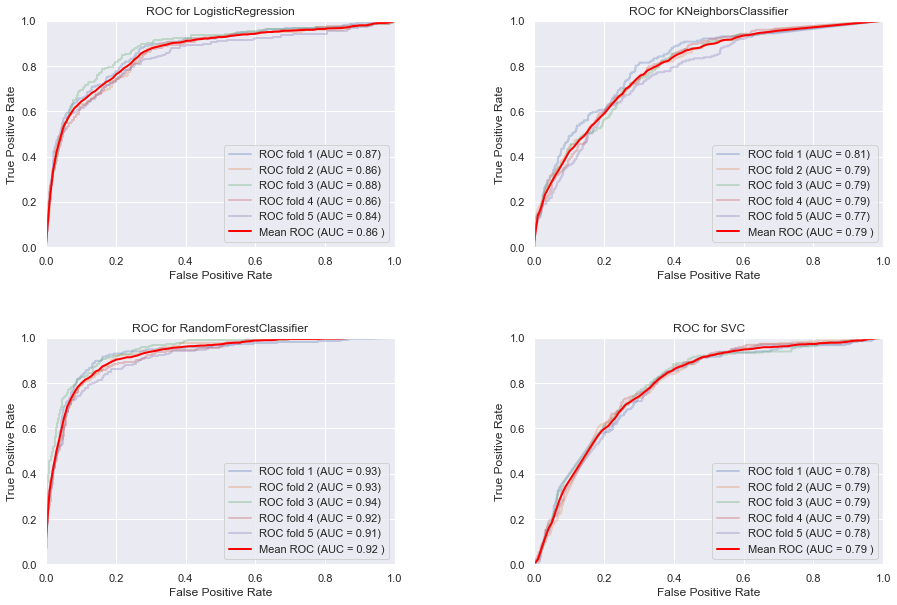

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [423]:
evaluation(X_train,y_train,clfs,5, True)


#### <font color = "# 000000">*__Plotting K fold CV with ROC for each model, using validation dataset in order to check if the models are overfitted:__*<br />


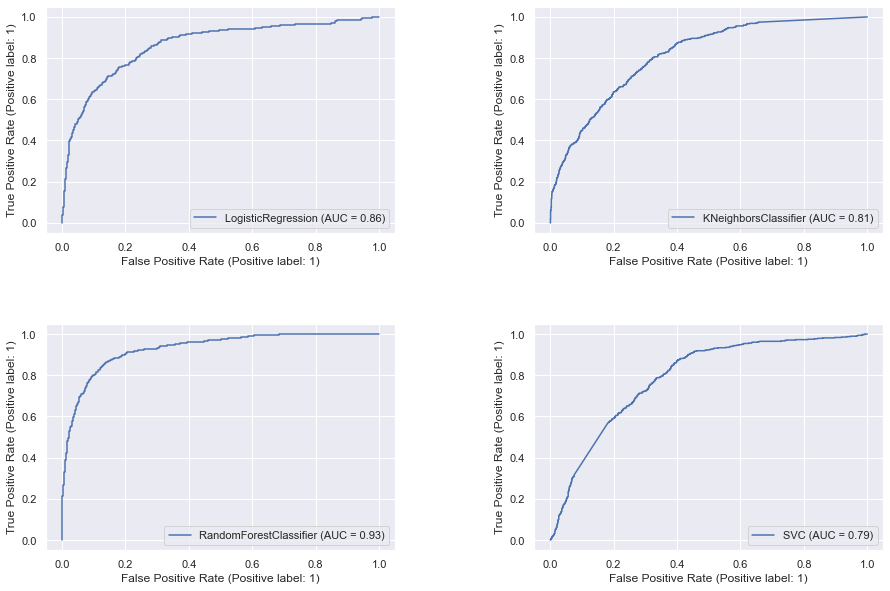

In [424]:
evaluation(X_val,y_val,clfs,5, False)

*By checking comparing the models' performance on the validation and training dataset, we can understand if they overfitted. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. contrary to the situation in this project, we recieved similar AUC score for both (train and validation) datasets, which means that there is no overfitting. so, applying these models on new data (test dataset) will perform simillary as its preformance on the train and validation datasets.* 

#### <font color = "# 000000">*__As we see, the highest AUC score is for the random forest classifier. Therfore, I will apply it for the final predictions.__*<br />


# <font color = "# 000000">*__Prediction and Submission__* <br />

In [425]:
# PIPLELINE FUNCTION

def prossesor(df_tr, df_ts):

    df_tr = drop_col(df_tr)
    df_ts = drop_col(df_ts)

    df_tr = object_to_num(df_tr)
    df_ts = object_to_num(df_ts)

    col_name = ['B', 'ExitRates']
    df_tr = remove_outliers_from_dataframe(df_tr, col_name)

    df_tr = grouping_values(df_tr)
    df_ts = grouping_values(df_ts)

    df_tr = pd.get_dummies(df_tr)
    df_ts = pd.get_dummies(df_ts)

    df_tr = filling_nans(df_tr)
    df_ts = filling_nans(df_ts)

    df_tr = normalization(df_tr)
    df_ts = normalization(df_ts)

    label = df_tr['purchase']

    ######################################

    df_t_copy = df_tr.copy()           

    mi_score=mutual_info_classif(df_t_copy.drop('purchase', axis=1), df_t_copy['purchase'])
    mi_score=pd.Series(mi_score*100,index=df_t_copy.drop('purchase', axis=1).columns)
    mi_score=mi_score.sort_values(ascending=False)

    best_features=mi_score.index[:25]
    # df = df_t_copy[best_features]

    bestOfthebest = best_features[:16]
    df_tr= df_t_copy[bestOfthebest]

    # df_tr= df
    df_ts = df_ts[bestOfthebest]

    ######################################

    #splitting the data  
    X_train, X_val, y_train, y_val = train_test_split(df_tr, label, test_size=0.3,stratify=label ,random_state=42)

    # choosing obtemal hyper parameters for Random Forest Classifier
    tuned_parameters = {
        'n_estimators':[20,40,100],
        'criterion':['gini', 'entropy'],
        'max_depth':[2,4,8],
        'max_features': [1,7,15]
    }
    rf = RandomForestClassifier(random_state=0)
    gs = GridSearchCV(rf, tuned_parameters, scoring='roc_auc',cv=KFold(5))
    gs.fit(X_train, y_train)
    #######################################

    # train the model
    rfc = RandomForestClassifier(n_estimators = 100,max_depth = 10,n_jobs = -1)
    rfc.fit(X_train, y_train)

    test_probs = rfc.predict_proba(df_ts)[:,1] # getting the class probabilities

    ids = df_ts['id']

    #prediction on test data set
    submission = pd.DataFrame({
        "":list(ids),
        "predict_prob":list(test_probs) 
        })

    print('FINISHED')
    return submission.to_csv("submission_group_9.csv", index=False) # create csv with prediction probs of class 1


In [426]:
prossesor(X, X_test)

FINISHED
